<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#手把手教你画数据地图之进阶篇" data-toc-modified-id="手把手教你画数据地图之进阶篇-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>手把手教你画数据地图之进阶篇</a></span><ul class="toc-item"><li><span><a href="#学习框架" data-toc-modified-id="学习框架-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>学习框架</a></span></li><li><span><a href="#数据地图的基本要素" data-toc-modified-id="数据地图的基本要素-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>数据地图的基本要素</a></span></li><li><span><a href="#Shapefile-和它的获取方式" data-toc-modified-id="Shapefile-和它的获取方式-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Shapefile 和它的获取方式</a></span></li></ul></li><li><span><a href="#GeoPandas-数据集" data-toc-modified-id="GeoPandas-数据集-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>GeoPandas 数据集</a></span></li><li><span><a href="#投影的选择" data-toc-modified-id="投影的选择-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>投影的选择</a></span></li><li><span><a href="#设置基本颜色" data-toc-modified-id="设置基本颜色-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>设置基本颜色</a></span></li><li><span><a href="#设置自定义的图例和刻度" data-toc-modified-id="设置自定义的图例和刻度-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>设置自定义的图例和刻度</a></span></li><li><span><a href="#色块上添加文本或数字" data-toc-modified-id="色块上添加文本或数字-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>色块上添加文本或数字</a></span></li><li><span><a href="#标题和备注的设置" data-toc-modified-id="标题和备注的设置-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>标题和备注的设置</a></span></li><li><span><a href="#结束语" data-toc-modified-id="结束语-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>结束语</a></span></li></ul></div>

# 手把手教你画数据地图之进阶篇

发布了手把手教你用Python画数据地图之入门篇之后，有小可爱问我：
“朱老师，你上次教的世界地图太简单了。你能不能教我画这个荷兰疫情图？”【对方发来一个链接】

https://mp.weixin.qq.com/s?__biz=MzI0MDcyNTg1Mg==&mid=2247483778&idx=1&sn=a211323957ffd3651ef2a349e91058a7&chksm=e9173bb1de60b2a758e2a93cb01b93883f8fd8c64b8246626c7c802aa6b30b2059bda24bb5d3&token=644010298&lang=zh_CN#rd

朱老师看完陷入了沉思：这问题也太直接了点儿吧！哪有让人把骗赞吃饭的家伙拿出来教给别人的。。。

想来想去。害，就教你了！

## 学习框架

我们今天的目标就是上面呈现的数据地图。既然是教学，我决定将一些细枝末节的技巧和工具撇开，抓住一些核心的方法和步骤。用最少的代码、最低限度的第三方库、最少的修饰技巧完成数据地图的绘制。至于一些比较细节和有针对性的技巧，则留到以后以实战专题形式来呈现吧。

希望大家在跟完这篇文章后，能够基本了解绘制数据地图的核心步骤和方法，并且亲自实践出来：选定一个感兴趣的国家，独立地画出自己的数据地图。

本篇的重点知识点包括以下部分：
- 数据地图的基本要素
- 形状文件 (Shapefile) 
- 地理数据（DataFrame for GeoPandas）
- 投影的选择
- 设置基本颜色
- 设置自定义的图例和刻度
- 色块上添加文本或数字
- 标题和备注的设置


## 数据地图的基本要素

上次介绍过，数据地图，就是把数据用颜色的不同或者深浅反映在不同的地理区块上。一幅数据地图需要画3个要素：    

区域的形状。也就是说我们要把不同的区域画成不同的色块，并且描绘它们的边界。这一点比较简单，只要对地理数据对象用 plot() 命令即可完成。    
区域的颜色。也就是说我们要把一个区域的数值（或特性）用不同的颜色或者深浅来反映出来。为了达到这个目的，我们首先需要给每个区域一个数值，然后我们需要确定数值和颜色之间的关系，最后我们把颜色涂到相应的区域上。    
图例和备注。只看到颜色，并不能让读者知道这个地区的数字的准确大小。所以，我们需要在图上加一些图例来告知读者颜色和数字的关系。

## Shapefile 和它的获取方式

一个地区的形状，在计算机里其实是用很多个点围成的多边形 (polygon)。我们将一个个点的坐标排列在一起，Python 就能将他们在图上画出来。而能被 Python 读取、用来描摹地区地理形状的地理数据文件叫 Shapefile (后缀名 .shp)。

在入门篇中，我们了解到 Geopandas 这个模块有自带的世界地图。这幅图在很多时候是不能满足我们的需求的：例如我们想要可视化湖北省每个县的人均可支配收入，这就需要详细的湖北省县级行政单位的地理数据。

好在，很多机构或个人都会提供地理数据信息的资源。我们可以比较方便地获取这些数据。但是，有些图形的精确度不高，有些数据比较过时，还有些土地存在争议。这就提醒我们在使用地理信息数据的时候要注意甄别，适当的时候要进行必要的调整。

世界各国的行政区划的地理信息数据，我们可以在你 GADM 这个网站上下载。链接为 https://gadm.org/download_country_v3.html 选取你需要的国家，然后点击 Shapefile。就会自动下载数据了。

下载的文件解压缩后，你可以看到若干的行政区域的数据文件。这里，后缀的数字表达的是行政区的级别。比如对于中国的数据而言，"_1"是省级行政单位，“_2”是市级行政单位，“_3”是县级行政单位。大家可以根据需要的层级进行选择。而每个相同的文件名由若干个不同后缀名的文件。我们关注的是(.shp)这个文件。

GADM 数据的优点是：方便下载、国家齐全、便于新人使用。它的缺点也很明显：对于每个国家的信息不够精确、更新不够迅速、有时候会有领土争议。打个比方，我们来看一下 GADM 的中国地图地市级行政区划的地理信息文件 (gadm36_CHN_2.shp)：

Text(0.5, 0.5, 'Incorrect Map of China on GADM')

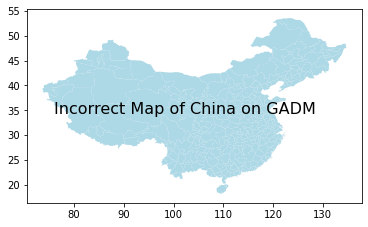

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
gdf = gpd.read_file('./gadm36_CHN_shp/gadm36_CHN_2.shp')
gdf.plot(color='lightblue')
plt.annotate(r"Incorrect Map of China on GADM", xy=(0.5, 0.5), size=16,
             xycoords='figure fraction', horizontalalignment='center')

很明显，这幅图有问题。台湾地区、香港地区、澳门地区、以及新疆的部分地区并没有出现。甚至九段线也没有了。这在朱老师看来是不可以直接拿来使用的，必须要进行更改。比如在 GADM 上下载台湾地区、香港地区、澳门地区以及印度（部分）的行政区划图，补充到中国的地图中来。当然，我们也可以寻找其他的数据库来获取更加准确的中国地图数据。好在我们今天要画的地图是只是江浙沪区域，所以只要选取一部分的数据，不需要用到整张图。

总而言之，在画数据地图的时候，我们必须要找到合适的数据源，并且做出必要的调整和修正。不能拿来主义。

# GeoPandas 数据集

我们接下来来介绍 GeoPandas 的基本的操作。关于这个包，我们在入门篇中已经稍微介绍过了。这里还是希望大家经常登录官方网站查阅官方的文档和教程。编程开始前，我们首先导入 geopandas, pandas, numpy, matplotlib 和 mapclassify。

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mapclassify

然后使用 read_file() 这个命令来读取我们刚刚下载的地图文件（我把刚刚解压缩的文件夹放在了这个 Python 程序的同目录下），存为名为 china 的对象。

In [3]:
china = gpd.read_file('./gadm36_CHN_shp/gadm36_CHN_2.shp')
type(china)

geopandas.geodataframe.GeoDataFrame

这里的读入后的对象 china 的数据结构是 GeoDataFrame。其实它是 Pandas.DataFrame 对象的拓展。也就是说它是个表格、一个数据集。我们可以使用 pandas 的命令来对它进行操作。我们来通过这个数据集第一个观测值来检视一下这个数据集有哪些变量。

In [4]:
china.iloc[0]

GID_0                                                      CHN
NAME_0                                                   China
GID_1                                                  CHN.1_1
NAME_1                                                   Anhui
NL_NAME_1                                                安徽|安徽
GID_2                                                CHN.1.1_1
NAME_2                                                  Anqing
VARNAME_2                                               Ānqìng
NL_NAME_2                                                  安庆市
TYPE_2                                                 Dìjíshì
ENGTYPE_2                                      Prefecture City
CC_2                                                      None
HASC_2                                                    None
geometry     POLYGON ((116.58146667 30.04758644, 116.578948...
Name: 0, dtype: object

我们发现，其实这个数据集就是反映了两件事儿：一个地理区块的各种属性（英文名、中文名、省名、市名等），和它的几何形状（geometry 变量）。

接下来，我们通过省的名字来选取出湖北省，并且保留中文市名和 geometry 两个变量，将它存为对象 hubei。

In [5]:
hubei = china.loc[china.NAME_1.isin(['Hubei']), ['NL_NAME_2', 'geometry']]
hubei.columns = ['name', 'geometry']

我们稍微修正一下襄阳市名。

In [6]:
hubei = hubei.replace('襄樊市', '襄阳市')

接下来，我们建立一个 DataFrame 表格叫做 df_number，它包含每个城市的疫情数据。然后我们将这个表格，根据城市名 name 合并到地图数据 hubei 中。

In [7]:
df_number = pd.DataFrame([['恩施土家族苗族自治州', '105'],
                          [u'鄂州市', 278],
                          [u'黄冈市', 1002],
                          [u'黄石市', 252],
                          [u'荆门市', 329],
                          [u'荆州市', 333],
                          [u'潜江市', 35],
                          [u'神农架林区', 7],
                          [u'十堰市', 212],
                          [u'随州市', 384],
                          [u'天门市', 99],
                          [u'武汉市', 4109],
                          [u'襄阳市', 441],
                          [u'咸宁市', 246],
                          [u'仙桃市', 140],
                          [u'孝感市', 749],
                          [u'宜昌市', 353]], columns=['name', 'number'])

df_number['number'] = df_number['number'].map(int)
hubei = hubei.merge(df_number, on='name')

hubei

,name,geometry,number
0,恩施土家族苗族自治州,"POLYGON ((109.46048 29.55436, 109.45979 29.552...",105
1,鄂州市,"POLYGON ((115.07079 30.25466, 115.06995 30.254...",278
2,黄冈市,"POLYGON ((115.72957 29.81506, 115.71960 29.822...",1002
3,黄石市,"POLYGON ((114.94901 29.54918, 114.94451 29.548...",252
4,荆门市,"POLYGON ((112.59979 30.69974, 112.59719 30.693...",329
5,荆州市,"POLYGON ((112.80006 29.73899, 112.79810 29.736...",333
6,潜江市,"POLYGON ((112.95060 30.52931, 112.94576 30.526...",35
7,神农架林区,"POLYGON ((110.94731 31.57398, 110.94160 31.569...",7
8,十堰市,"POLYGON ((109.89953 31.52810, 109.89734 31.527...",212
9,随州市,"POLYGON ((113.91772 31.39166, 113.92026 31.395...",384


有了这三列数据（城市名称、城市形状、城市数据），我们就可以用 hubei 这个对象的 plot 方法画出基本地图轮廓了。

<AxesSubplot:>

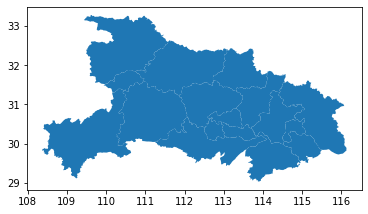

In [8]:
hubei.plot()

# 投影的选择
我们可以从上图看到。这幅地图比较狭长。这是受到了数据默认的投影模式的影响。为了得到一个看起来比较“正常”的地图，我们需要修改投影的模式。这里我们使用我国的 CGCS2000 标准（epsg: 4508）。更改了投影模式之后，地图形状将会变得“正常”。

C:\Users\ZHU\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

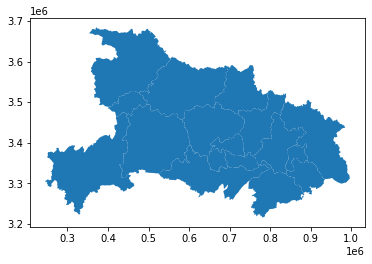

In [9]:
hubei = hubei.to_crs({'init': 'epsg:4508'})
hubei.plot()

# 设置基本颜色
我们下一步来选择地图的基本颜色。数据越高，那么颜色也更深。我们可以在这个页面上查询Matplotlib所提供的颜色（渐变色）https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

我们今天画的地图采用的是橙红渐变（OrRd），也就是说数字小就偏淡橙色，数字大就偏深红色。

确定了颜色之后，我们就能使用入门篇中介绍的命令 plot() 来画地图了。

(208230.0234930166, 1033673.6030023085, 3193235.425809708, 3707752.693052896)

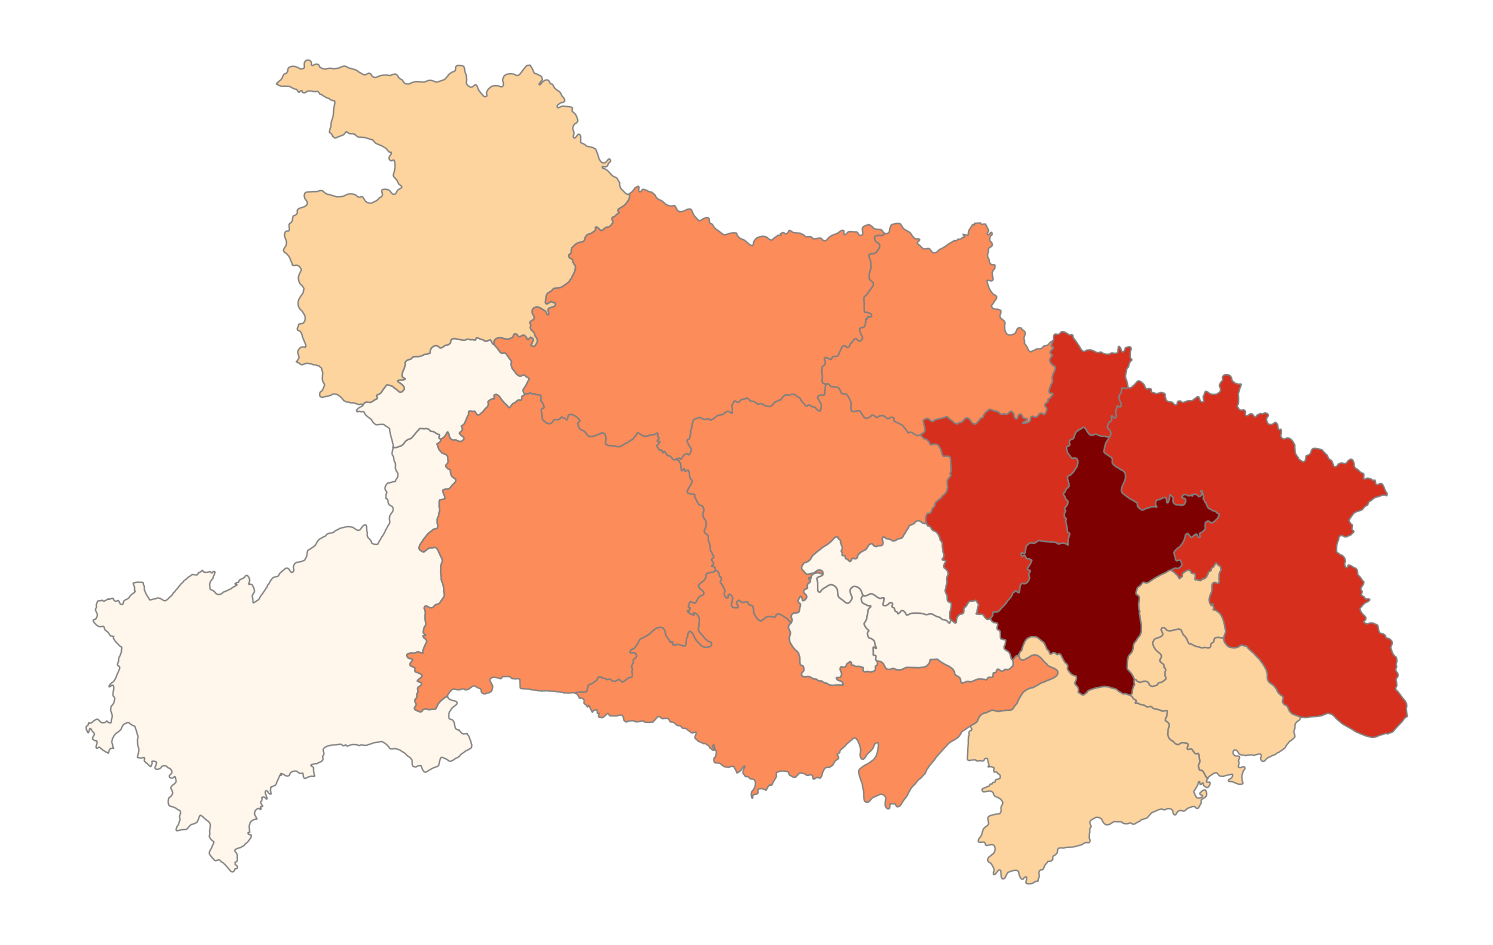

In [10]:
fig, ax = plt.subplots(1, figsize=(10, 6), dpi=200)

hubei.plot(
    column='number', cmap='OrRd', scheme='FisherJenks', linewidth=0.5, edgecolor='0.5', ax=ax)
ax.axis('off')

这张图已经具备了数据地图的基本要素：色块的形状和颜色。之后我们就要加入一些其他的“配件”来帮助阅读者理解这幅地图。

# 设置自定义的图例和刻度
第一个重要的配件是图例。它显示了数字和颜色的对应关系。

以下代码中，我们用图片使用的过度颜色 OrRd 生成了一个图例，并且根据hubei 表格中 number 这一列的数字的范围，建立对应的数字刻度。这里要注意，图例中数字刻度的 scale 使用的是 FisherJenks 分割方法，这个必须方法和之前画图的时候的选项一致。

C:\Users\ZHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


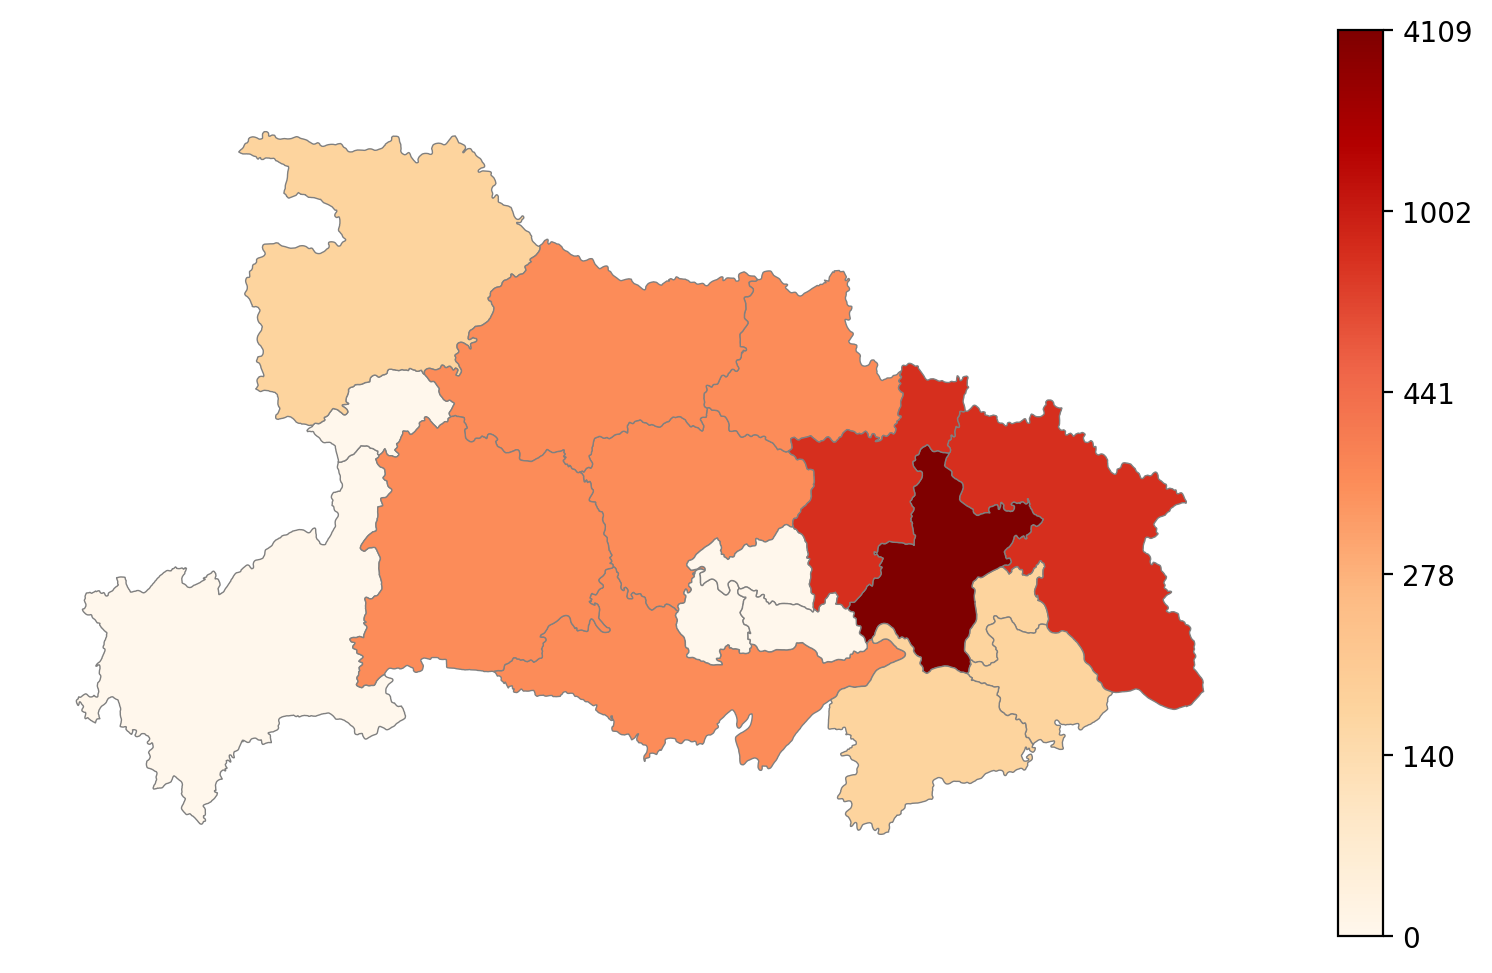

In [11]:
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='OrRd')
# add the colorbar to the figure
cbar = fig.colorbar(sm)
bins = mapclassify.FisherJenks(hubei['number'], 5).bins
bins = np.insert(bins, 0, 0)
_ = cbar.ax.set_yticklabels(bins)

fig

# 色块上添加文本或数字
接下来，我们在图中的色块上加入城市的名字，以便于读者理解。

注意，当我们要标注中文的话，需要进行预设。

In [12]:
import sys
from matplotlib.font_manager import FontManager
fm = FontManager()
plt.rcParams['font.sans-serif'] = ['SimHei']

In [13]:
for index, row in hubei.iterrows():
    xy = row['geometry'].centroid.coords[:]
    xytext = row['geometry'].centroid.coords[:]
    ax.annotate(row['name'], xy=xy[0], xytext=xytext[0],
                 horizontalalignment='center', verticalalignment='center')

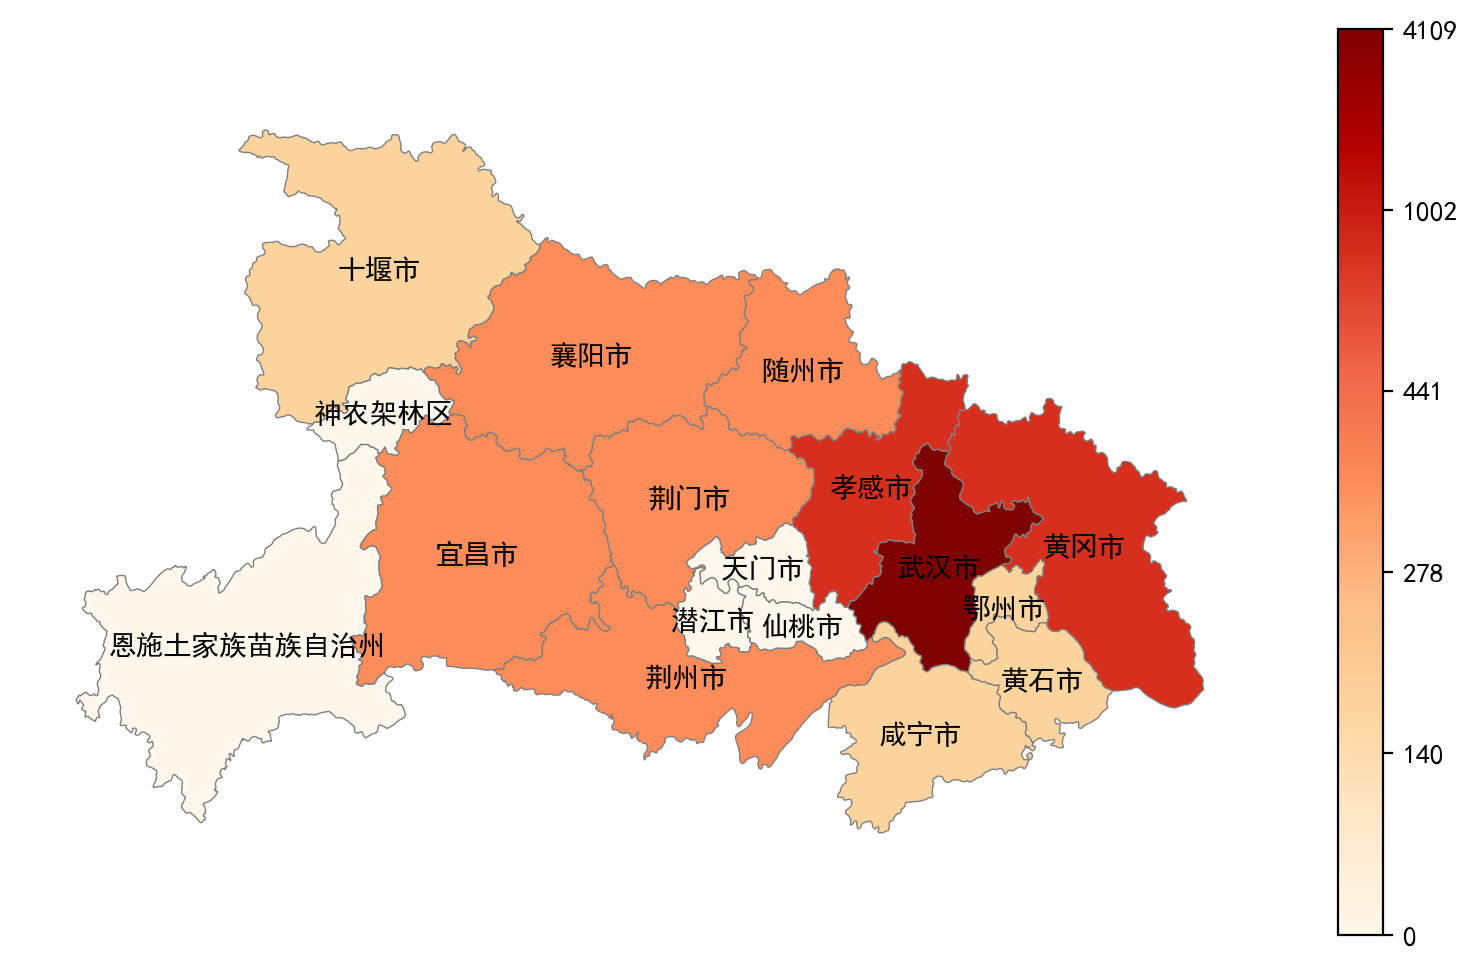

In [14]:
fig

# 标题和备注的设置
最后，我们可以用 Axes 的 set_title 和 annotate 方法给数据地图添加标题和备注。

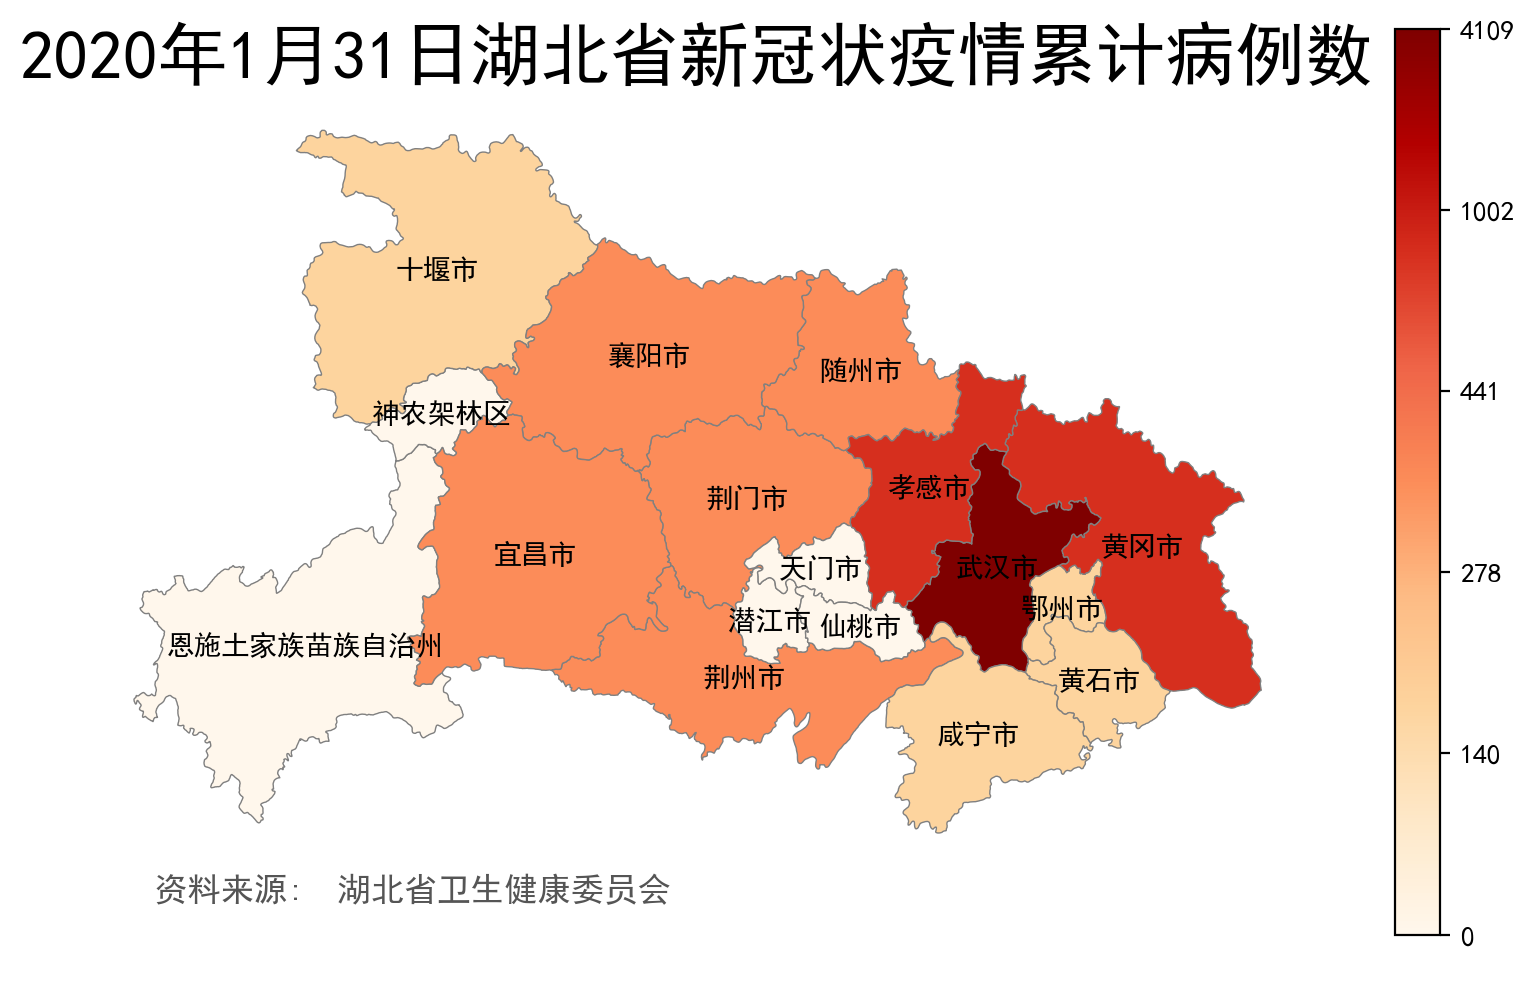

In [15]:
ax.set_title('2020年1月31日湖北省新冠状疫情累计病例数', fontdict={
             'fontsize': '25', 'fontweight': '1'})
ax.annotate('资料来源:  湖北省卫生健康委员会', xy=(0.1, .12),  xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
fig

# 结束语

好了，我们今天获得了一副更加定制化并且本地化的数据地图。怎么样，想不想亲自动手试一试？

如果有任何意见、建议、问题，都欢迎来跟我交流哦！我也很欢迎大家跟我分享你们画出的数据地图。

那么谢谢大家的阅读，我们下次再见！